the timeforce inverses are:
[1.00041109e+09 9.96683614e+08 9.94757759e+08 9.92258337e+08
 9.84996201e+08 9.81427841e+08 9.77373152e+08 9.74726419e+08]
the powers are:
[0.99958906 1.00332733 1.00526984 1.00780191 1.01523219 1.01892357
 1.02315064 1.0259287 ]
the masses are:
[0.00199    0.00199    0.00199001 0.00199    0.0019919  0.00199057
 0.00199009 0.0019901 ]
the volumes are:
[8.13390449e-01 5.30817411e+00 1.40300157e+01 4.96669989e+01
 1.97714822e+03 1.23053064e+04 9.87521265e+04 3.85688457e+05]
keplerian_newton velocities are:
[1.51457268e+10 1.10793879e+10 9.42244483e+09 7.63241500e+09
 4.13047589e+09 3.04549500e+09 2.15236318e+09 1.71514374e+09]
G from timeforce
[1.45357828e-16 2.73670817e-16 3.79850365e-16 5.81838053e-16
 2.01415078e-15 3.73438643e-15 7.54058202e-15 1.19395222e-14]


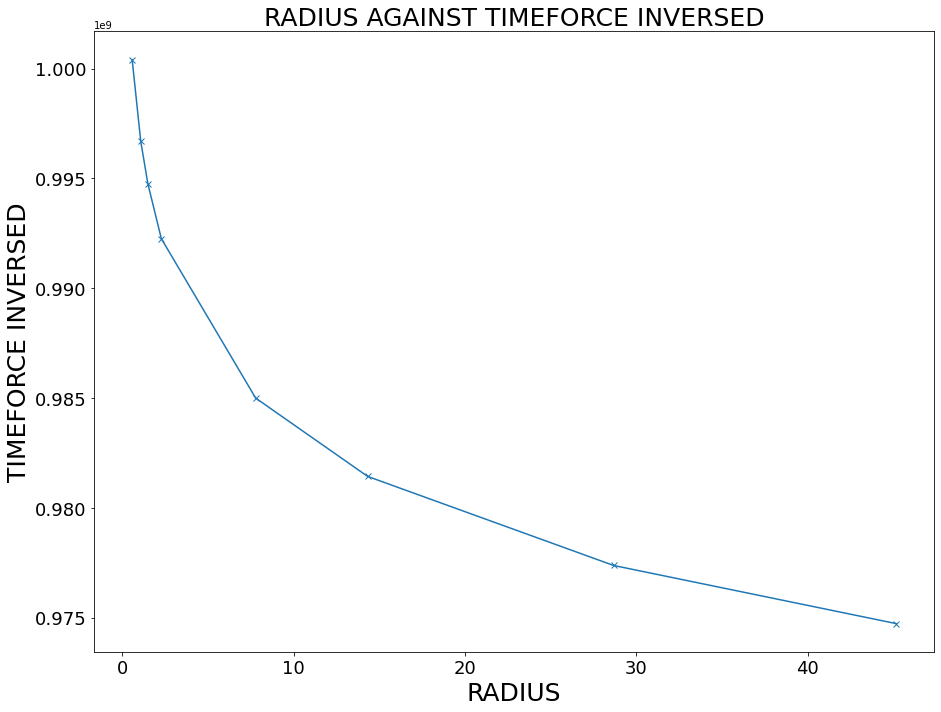

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Define the mass of the sun
MASS = 1.99e30
G = 6.6743*10**-11
l = 0.01

# Define the planet data
planets = ["Mercury", "Venus", "Earth", "Mars",
           "Jupiter", "Saturn", "Uranus", "Neptune"]
masses = np.array([3.30e23, 4.87e24, 5.97e24, 6.42e23,
                  1.90e27, 5.68e26, 8.68e25, 1.02e26])

radii = np.array([0.579, 1.082, 1.496, 2.280, 7.785, 14.32,
                 28.67, 45.15])  # radius in R/(1e-9)

# Calculate X_I, Y_I, A_I, and Z_I for each planet


def xvalues(planets, masses, MASS):
    X_I = []
    for i in range(len(planets)):
        x_i = (masses[i] + MASS) / 10**33  # calculating the relative mass mass
        X_I.append(x_i)
    return np.array(X_I)


def yvalues(planets, radii):
    Y_I = []
    for i in range(len(planets)):
        y_i = 88*(21**-1)*(radii[i]**3)             # calculating the volume
        Y_I.append(y_i)
    return np.array(Y_I)


def avalues(planets, Y_I, X_I):
    A_I = []
    for i in range(len(planets)):
        a_i = Y_I[i]**X_I[i]  # calculating the power
        A_I.append(a_i)
    return np.array(A_I)


def zvalues(planets, A_I):
    Z_I = []
    for i in range(len(planets)):
        z_i = 1/np.log((1.000000001)**A_I[i])  # calculating the timeforce
        Z_I.append(z_i)
    return np.array(Z_I)


def V_Ngravity(planets, radii, MASS, G):
    VG = []
    for i in range(len(planets)):
        vg = math.sqrt((G*MASS)/radii[i])
        VG.append(vg)
    return np.array(VG)


def G_con(planets, radii, X_I, Z_I, G):
    G_const = []
    for i in range(len(planets)):
        g_const = (radii[i]/(2*X_I[i]*Z_I[i]**2))
        G_const.append(g_const)
    return np.array(G_const)


X_I = xvalues(planets, masses, MASS)     # mass
Y_I = yvalues(planets, radii)            # volume
A_I = avalues(planets, Y_I, X_I)         # power
Z_I = zvalues(planets, A_I)              # timeforce
VG = V_Ngravity(planets, radii, MASS, G)          # velocity
G_const = G_con(planets, radii, X_I, Z_I, G)  # gravitational constant


print("the timeforce inverses are:")
print(Z_I)
print("the powers are:")
print(A_I)
print("the masses are:")
print(X_I)
print("the volumes are:")
print(Y_I)
print("keplerian_newton velocities are:")
print(VG)
print("G from timeforce")
print(G_const)


# Plotting X_I against Y_I
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(radii, Z_I, 'x-')  # 'x-' means use 'x' as marker and '-' as line type
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('RADIUS AGAINST TIMEFORCE INVERSED', fontsize=25)
plt.xlabel('RADIUS', fontsize=25)
plt.ylabel('TIMEFORCE INVERSED', fontsize=25)


plt.tight_layout()
plt.show()

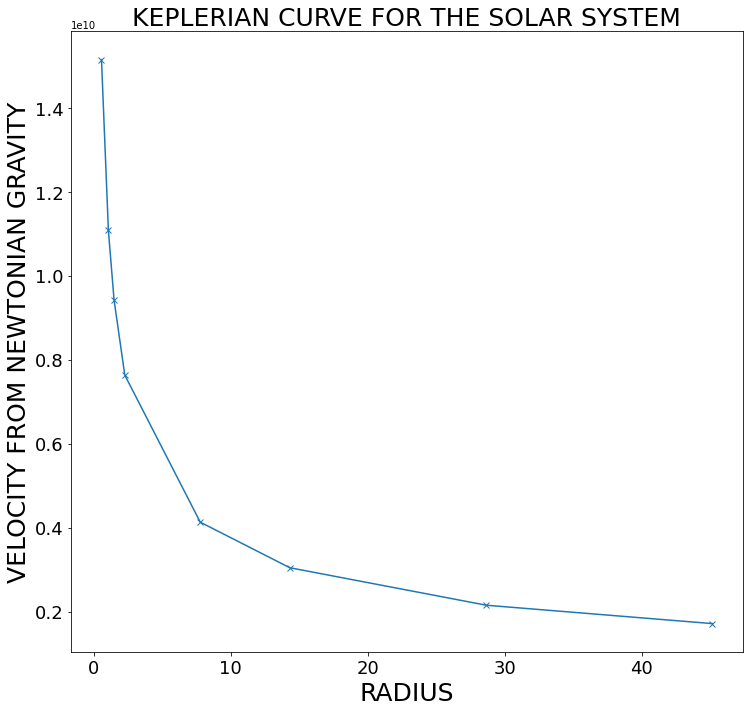

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(radii, VG, 'x-')  # 'x-' means use 'x' as marker and '-' as line type
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('KEPLERIAN CURVE FOR THE SOLAR SYSTEM', fontsize=25)
plt.xlabel('RADIUS', fontsize=25)
plt.ylabel('VELOCITY FROM NEWTONIAN GRAVITY', fontsize=25)

plt.tight_layout()
plt.show()

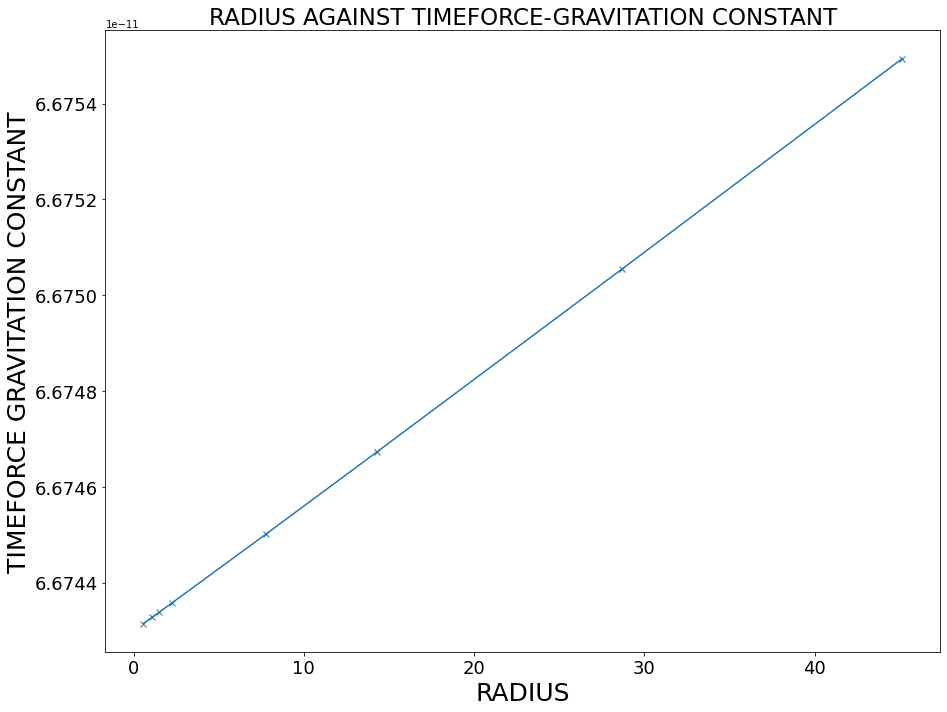

In [6]:


plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
# 'x-' means use 'x' as marker and '-' as line type
plt.plot(radii, (G+G_const), 'x-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('RADIUS AGAINST TIMEFORCE-GRAVITATION CONSTANT', fontsize=23)
plt.xlabel('RADIUS', fontsize=25)
plt.ylabel('TIMEFORCE GRAVITATION CONSTANT', fontsize=25)


plt.tight_layout()
plt.show()

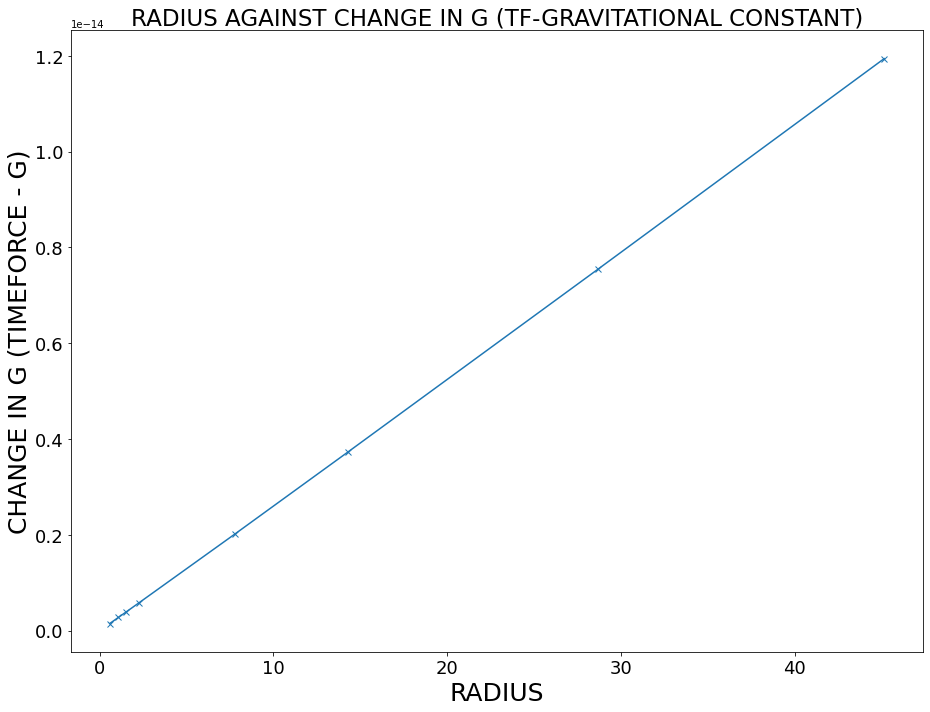

In [7]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
# 'x-' means use 'x' as marker and '-' as line type
plt.plot(radii, (G_const), 'x-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('RADIUS AGAINST CHANGE IN G (TF-GRAVITATIONAL CONSTANT)', fontsize=23)
plt.xlabel('RADIUS', fontsize=25)
plt.ylabel('CHANGE IN G (TIMEFORCE - G)', fontsize=25)


plt.tight_layout()
plt.show()

In [10]:
def G_con(planets, radii, X_I, Z_I, G):
    G_const = []
    for i in range(len(planets)):
        g_const = G + (radii[i]/(2*X_I[i]*Z_I[i]**2))
        G_const.append(g_const)
    return np.array(G_const)


TF_G_const = G_con(planets, radii, X_I, Z_I, G)

In [9]:
import pygame
import math

pygame.init()

WIDTH, HEIGHT = 800, 800
WIN = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption(
    "SOLAR SYSTEM PLANETARY MOTION SIMULATION USING TIMEFORCE-GRAVITATION CONSTANT")

YELLOW = (255, 250, 0)
BLUE = (100, 150, 237)
RED = (188, 40, 50)
DARK_GREY = (80, 80, 80)
WHITE = (255, 255, 255)

FONT = pygame.font.SysFont("comicsans", 20)


class Planet:
    AU = 149.6e6 * 1000
    G = 6.67428e-11
    SCALE = 200/AU  # 1 AU = 100px
    TIMESTEP = 3600*7*2  # in a day
    Q = TF_G_const

    def __init__(self, x, y, radius, color, mass, Q):
        self.x = x
        self.y = y
        self.radius = radius
        self.color = color
        self.mass = mass
        self.Q = Q

        self.orbit = []
        self.sun = False
        self.disttance_to_sun = 0

        self.x_vel = 0
        self.y_vel = 0

    def draw(self, win):
        x = self.x*self.SCALE + WIDTH / 2
        y = self.y*self.SCALE + HEIGHT / 2

        updated_points = []
        if len(self.orbit) > 2:
            for point in self.orbit:
                x, y = point
                x = x*self.SCALE + WIDTH / 2
                y = y*self.SCALE + HEIGHT / 2
                updated_points.append((x, y))

        if len(updated_points) >= 2:
            pygame.draw.lines(win, self.color, False, updated_points, 1)

        if not self.sun:
            distance_text = FONT.render(
                f"{round(self.distance_to_sun/1000, 1)}km", 1, WHITE)
            win.blit(distance_text, (x, y))

        pygame.draw.circle(win, self.color, (x, y), self.radius)

    def attraction(self, other):
        other_x, other_y = other.x, other.y
        distance_x = other_x - self.x
        distance_y = other_y - self.y
        distance = math.sqrt(distance_x**2 + distance_y**2)

        if other.sun:
            self.distance_to_sun = distance

        force = self.Q * self.mass * other.mass / distance**2
        theta = math.atan2(distance_y, distance_x)

        force_x = math.cos(theta) * force
        force_y = math.sin(theta) * force
        return force_x, force_y

    def update_position(self, planet):
        total_fx = total_fy = 0

        for planet in planet:
            if self == planet:
                continue
            fx, fy = self.attraction(planet)
            total_fx += fx
            total_fy += fy

        self.x_vel += total_fx/self.mass * self.TIMESTEP
        self.y_vel += total_fy/self.mass * self.TIMESTEP

        self.x += self.x_vel * self.TIMESTEP
        self.y += self.y_vel * self.TIMESTEP

        self.orbit.append((self.x, self.y))


def main():
    run = True
    clock = pygame.time.Clock()
    sun = Planet(0, 0, 30, YELLOW, 1.98892*10**30, Planet.Q[1])
    sun.sun = True

    mercury = Planet(0.387*Planet.AU, 0, 8, DARK_GREY,
                     0.33*10**24, Planet.Q[1])
    mercury.y_vel = -47.4*1000
    venus = Planet(-0.723*Planet.AU, 0, 14, WHITE,
                   4.8685*10**24, Planet.Q[2])
    venus.y_vel = 35.02*1000
    earth = Planet(1*Planet.AU, 0, 16, BLUE, 5.9742*10**24, Planet.Q[3])
    earth.y_vel = -29.793*1000
    mars = Planet(-1.524*Planet.AU, 0, 12, RED, 6.39*10**23,  Planet.Q[4])
    mars.y_vel = 24.007*1000

    planets = [sun, earth, mars, mercury, venus]

    while run:

        clock.tick(30)
        WIN.fill((1, 1, 1))

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

        for planet in planets:
            planet.update_position(planets)
            planet.draw(WIN)

        pygame.display.update()

    pygame.quit()


main()

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
